# Analyzes of Hacked Netherlands Websites (2019)

In this study, we want to analyze the hacked (attacked by various methods) Netherlands Websites (extension of __.nl__) in 2019. For the study, we get the data from zone-h.org, which is an open-source database formed by attackers themselves. Because of the captcha warn, we use the cookies of our own browser which we used to access the site before.

__We will scrape the "2Q and 3Q (last 6 months) data of 2019", because zone-h.org listed only 50 pages (last 1250 records). So, it is impossible to reach the 1Q data of 2019 currently. But we also scraped the 1Q data of 2019 before, so after these scrape we will merge these 2 datasets.__

In [12]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime
import calendar

df=pd.DataFrame()
start_date = pd.to_datetime('2019/04/01')
print('Scrape is starting...')
cookie = {'PHPSESSID': 'sclbuaeq74okoln5t7437ngms5','ZHE':'9761f39e14f84791346a2ae3398c1db3'}
page_no=1
today_date=pd.to_datetime('today')
finish_date=pd.to_datetime('2019/09/30')

while today_date>start_date and page_no<=50: #because zone-h.org listed only 50 pages
#while page_no<3:
    url='http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page={}'.format(page_no)
    print(url)
    response = requests.post(url, cookies=cookie)
    data = response.text
    soup = BeautifulSoup(data,'lxml')

    for tr in soup.select('tr')[:-2]:
        row = []
        for td in tr.select('td'):
            if td.text.strip():
                row.append(td.text.strip())
            else:
                img = td.select_one('img[title]')
                if img:
                    row.append(img['title'])
                else:
                    row.append('')
            a = ["0" if x == '' else x for x in row] #cleaning the NaN values as 0
        df = df.append([a])
    print('Page {} is complete'.format(page_no))
    page_no+=1
    df[0] = pd.to_datetime(df[0], errors='coerce', format='%Y/%m/%d') #Arrange the Time column
    today_date=df.nsmallest(1,columns = 0)[0][0] #find the smallest date for continuing to loop
else:
#Set first row as header
    df.columns = df.iloc[0]
    df = df[1:]
    df.rename(columns={ df.columns[0]: "Time",df.columns[5]: "S_Location",df.columns[6]: "Special" }, inplace = True)
    df["S_Location"] = df["S_Location"].replace("0", "Unknown")#Set the location value of 0 to Unknown
    df["R"] = df["R"].replace("R", "1")#Set the ReAttack value of R to 1
    print('Scrape the data of 2009 is finish')
    df = df[df.Time >= start_date] #eliminate the data before start date
    df = df[finish_date>= df.Time] #eliminate the data after finish date
    df=df.reset_index(drop=True)
df.to_csv('Zone_H_{}.csv'.format(datetime.datetime.now().strftime('%d.%m.%Y_%H.%M')))#Save as csv file
print('The data is ready!')

Scrape is starting...
http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page=1
Page 1 is complete
http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page=2
Page 2 is complete
http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page=3
Page 3 is complete
http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page=4
Page 4 is complete
http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page=5
Page 5 is complete
http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page=6
Page 6 is complete
http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page=7
Page 7 is complete
http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page=8
Page 8 is complete
http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page=9
Page 9 is complete
http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page=10
Page 10 is complete
http://www.zone-h.org/archive/filter=1/domain=.nl/fulltext=1/page=11
Page 11 is complete
http://www.zone-h

In [13]:
df.head()

,Time,Notifier,H,M,R,S_Location,Special,Domain,OS,View
0,2019-09-30,crash-d4rk-h4cker,H,0,0,Netherlands,0,www.midgetgolfalmere.nl,Linux,mirror
1,2019-09-30,Mister Spy,0,0,1,Netherlands,0,kreatievekringwestervoort.nl//...,Linux,mirror
2,2019-09-30,Mister Spy,0,0,1,Netherlands,0,kupnodomu.nl///images/def.txt,Linux,mirror
3,2019-09-30,Mister Spy,0,M,1,Netherlands,0,hveland.nl//images/def.txt,Linux,mirror
4,2019-09-30,Mister Spy,0,0,1,Netherlands,0,inekevanbeersum.nl//images/def...,Linux,mirror


__We merge the 1Q data of 2019 (which we scraped before and saved as *Zone_H_2019_Q1.csv*) with 2Q and 3Q data of 2019.__

In [14]:
df_q1=pd.read_csv('Zone_H_2019_Q1.csv')
df_q1['Time'] = pd.to_datetime(df_q1['Time'], format='%m/%d/%Y') #Arrange the Time column
df=pd.concat([df,df_q1])
df.to_csv('Zone_H_2019_Q3.csv') #Save the first 3Q data for using in the future :)
df.head()

,Time,Notifier,H,M,R,S_Location,Special,Domain,OS,View
0,2019-09-30,crash-d4rk-h4cker,H,0,0,Netherlands,0,www.midgetgolfalmere.nl,Linux,mirror
1,2019-09-30,Mister Spy,0,0,1,Netherlands,0,kreatievekringwestervoort.nl//...,Linux,mirror
2,2019-09-30,Mister Spy,0,0,1,Netherlands,0,kupnodomu.nl///images/def.txt,Linux,mirror
3,2019-09-30,Mister Spy,0,M,1,Netherlands,0,hveland.nl//images/def.txt,Linux,mirror
4,2019-09-30,Mister Spy,0,0,1,Netherlands,0,inekevanbeersum.nl//images/def...,Linux,mirror


#### The Dataframe Legend:
**H** : Homepage defacement

**M** : Mass defacement

**R** : Redefacement

**S_Location** : IP address location of web site server

**Special** : Defacements of important websites

In [53]:
print('The total hacked (.nl) web sites in first 3Q of 2019 is: {}'.format(df.shape[0]))
df.head()

The total hacked (.nl) web sites in first 3Q of 2019 is: 1558


,Time,Notifier,H,M,R,S_Location,Special,Domain,OS,View
0,2019-09-30,crash-d4rk-h4cker,H,0,0,Netherlands,0,www.midgetgolfalmere.nl,Linux,mirror
1,2019-09-30,Mister Spy,0,0,1,Netherlands,0,kreatievekringwestervoort.nl//...,Linux,mirror
2,2019-09-30,Mister Spy,0,0,1,Netherlands,0,kupnodomu.nl///images/def.txt,Linux,mirror
3,2019-09-30,Mister Spy,0,M,1,Netherlands,0,hveland.nl//images/def.txt,Linux,mirror
4,2019-09-30,Mister Spy,0,0,1,Netherlands,0,inekevanbeersum.nl//images/def...,Linux,mirror


## Analyze of Data

#### 1) Analyze the Attackers
While analyze the 1558 attacked web sites, we understood that __the (.nl) websites are attacked by 199 different attackers__, in 2019.

In [19]:
df_attacker=df.groupby(['Notifier']).Time.agg('count').to_frame('N_Count').sort_values(by = 'N_Count',ascending=False).reset_index()
print('{} (.nl) web sites hacked in first 3Q of 2019 by {} different attackers'.format(format(df.shape[0]),df_attacker.shape[0]))
df_attacker.to_csv('Zone_H_2019_Q3_attacker.csv') #Save the first 3Q data for using in the future :)
df_attacker.head()

1558 (.nl) web sites hacked in first 3Q of 2019 by 199 different attackers


,Notifier,N_Count
0,GR0V,172
1,Imam,98
2,Mister Spy,66
3,Royal Battler BD,66
4,ErrOr SquaD,64


#### 2) Analyze the Attacks By Monthly
While analyze the 1558 hacked web sites, we understood that __the (.nl) websites are attacked every month in first 3Q of 2019__, nearly the same average except March.

In [20]:
df_daily=df.groupby(['Time']).Time.agg('count').to_frame('Count').reset_index() #group by day and create a new dataframe (df_daily)
df_monthly=df_daily.groupby(df_daily['Time'].dt.strftime('(%m) %B'))['Count'].sum().reset_index() #group by month and create a new dataframe (df_monthly)
df_monthly

,Time,Count
0,(01) January,158
1,(02) February,196
2,(03) March,359
3,(04) April,129
4,(05) May,105
5,(06) June,120
6,(07) July,121
7,(08) August,143
8,(09) September,227


As we see in plot bar; the (.nl) websites are attacked every month nearly same number except March

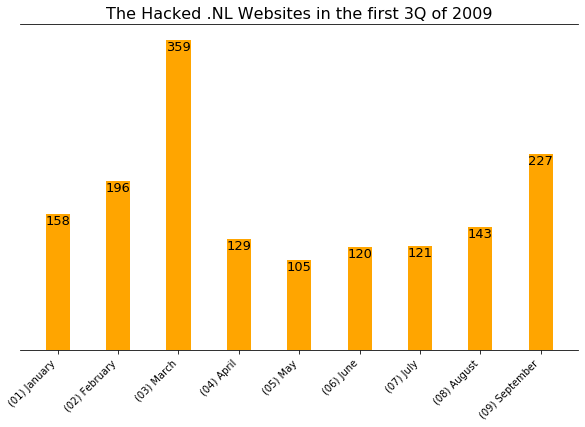

In [78]:
### Plotting
fig=plt.figure(figsize=(10, 6))
xvals = np.arange(df_monthly.shape[0])
bars=plt.bar(xvals, df_monthly['Count'], color = 'orange', label='Monthly HAcked Websites in NL', width = 0.4)

# direct label each bar with Y axis values
for i, bar in enumerate(bars):
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_y()+bar.get_height(), df_monthly['Count'][i] , 
                 ha='center', va='top', color='black', fontsize=13)

### Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['left','right']] #Remove left and right frame
plt.yticks([]) #disable ythicks

#Adding Title-Label-Legend
plt.title('The Hacked .NL Websites in the first 3Q of 2009', size=16)
plt.xticks(xvals, df_monthly['Time'],rotation=45, ha='right')


plt.show()

#### 3) Analyze the ReAttack Info
While analyze the 1558 hacked web sites, we understood that __356 (.nl) websites are also attacked before__, in 2019.

In [51]:
df_reattack=df.groupby(['R']).Time.agg('count').to_frame('RA_Count').sort_values(by = 'RA_Count',ascending=False).reset_index()
df_reattack.rename(columns={ df_reattack.columns[0]: "ReAttack"}, inplace = True)
df_reattack.head()

,ReAttack,RA_Count
0,0,1202
1,1,356


As we see in pie chart; __23% of the total websites are also attacked before__ in 2019

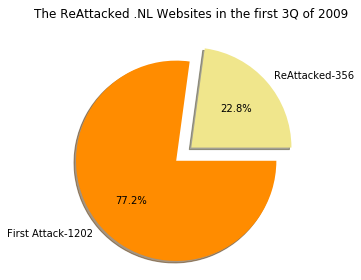

In [77]:
#set the explode and colors
explode = (0.2,0)
colors = ['darkorange','khaki']
plt.title('The ReAttacked .NL Websites in the first 3Q of 2009') # title to the pie chart
#show the pie chart
plt.pie(df_reattack['RA_Count'], explode=explode,colors=colors,labels=('First Attack-{}'.format(df_reattack['RA_Count'][0]),'ReAttacked-{}'.format(df_reattack['RA_Count'][1])), autopct='%1.1f%%',counterclock=False, shadow=True)
plt.tight_layout()
plt.show()

#### 4) Analyze the Server Locations:
While analyze the 1558 hacked web sites, we understood that the web sites exits in 16 different location (country)

In [56]:
df_location=df.groupby(['S_Location']).Time.agg('count').to_frame('L_Count').sort_values(by = 'L_Count',ascending=False).reset_index()
df_location

,S_Location,L_Count
0,Netherlands,1240
1,United States,98
2,United Kingdom,57
3,Ireland,54
4,Germany,32
5,Unknown,28
6,Belgium,14
7,Denmark,11
8,Poland,5
9,Turkey,5


Because of clearness, we showed top 5 countries where the server locations are exist. As we see in pie chart; __20% of the websites__ are located outside of Netherlands

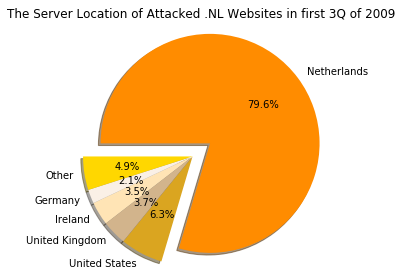

In [74]:
#the top 5
df_location2 = df_location[:5].copy()
value=df_location['L_Count'][5:].sum()
df_location2.loc[6]=['Other', value]

#set the explode and colors
explode = (0.2,0,0,0,0,0)
colors = ['darkorange','goldenrod','tan','moccasin','linen','gold','khaki','yellowgreen']
plt.title('The Server Location of Attacked .NL Websites in first 3Q of 2009') # title to the pie chart
#show the pie chart
plt.pie(df_location2['L_Count'], explode=explode,colors=colors,labels=df_location2['S_Location'], autopct='%1.1f%%',counterclock=False, shadow=True,startangle=180)
plt.tight_layout()
plt.axis('scaled')
plt.show()

## Result and Evaluation

We understood in this study;
- 1558 (.nl) websites are attacked (hacked) in the first 3Q of 2019.
- Websites are attacked by 199 different attackers
- Websites are attacked every month nearly same average, except March
- __356 websites (23% of total) are also attacked before__
- Websites exits 16 different country and 20% them are located outside of Netherlands